# Fast Fourier Transform

## Naive Polynomial Multiplication:
1. Take the coefficient representations of two polynomials (start with two of equal degree)
2. Use two `for` loops to multiply the the coefficients of each polynomial pairwise, giving $n^2$ products
3. Collect like terms
4. Return the output in coefficient representation

Example:

$A(x)=2+3x+7x^2 \implies$ `A=[2,3,7]`

$B(x)=1+2x^2 \implies$ `B=[1,0,2]`

$C(x)=A(x)\cdot B(x)=z+3+11x^2+6x^3+14x^4 \implies$ `C=[2,3,11,6,14]`

$d_A = 2, d_B = 2, d_C=d_B + d_B=4$ where d is the degree of some polynomial

$n_A=3, n_B=3, n_C=d_C+1=5$ where n is the number of terms in some polynomial

We want to add exponents and multiply coefficients. In terms of array indexing, `A[i]*B[j]=C[i+j]` since `i+j` gives us the new exponent, and therefore the index for the coefficent, and `A[i]+B[j]` gives us the coefficient itself at that index.

In [2]:
def naive_multiplication(A: list[int], B: list[int]):
    n_A = len(A)
    n_B = len(B)
    
    d_A = n_A -1
    d_B = n_B -1
    
    # Get the degree and number of terms for the new polynomial, C(x)
    d_C = d_A + d_B
    n_C = d_C + 1
    
    # Initialise an array to store the coefficeints of C(x)
    C = [0 for i in range(n_C)]

    for i in range(n_A):
        for j in range(n_B):
            C[i+j] = C[i+j] + A[i]*B[j]

    return C

A = [2,3,7]
B = [1,0,2]
# expected output: [2, 3, 11, 6, 14]
naive_multiplication(A, B)

[2, 3, 11, 6, 14]

## Step 2 -- Multiply Two Polynomials in Value Representation

In [1]:
import cmath

def multiply_values(A, B):
    """The function two arrays of length n containing complex numbers, and carries out an element-wise multiplication.
    The function returns the product as an array of length n."""
    C = [0 for _ in range(len(A))]
    for i in range(len(C)):
        C[i] = A[i]*B[i]
    return C

# Test
A = [(1+0j), 1j, (-1+0j), (-0-1j)]
B = [(1+0j), 1j, (-1+0j), (-0-1j)]
C = multiply_values(A, B)
print(C)

[(1+0j), (-1+0j), (1-0j), (-1-0j)]


## Converting and Plotting Complex Numbers

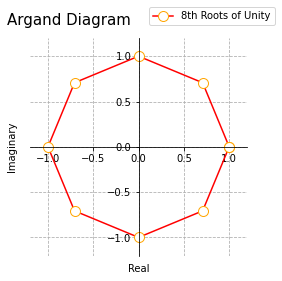

In [108]:
import numpy as np
import matplotlib.pyplot as plt 
import cmath
from math import cos, sin, pi, exp

def polar_form(theta, r=1):
    return round(r*(cos(theta)), 5), round(r*(sin(theta)), 5)

def real_component(theta, r=1):
    return round(r*(cos(theta)), 5)

def imaginary_component(theta, r=1):
    return round(r*(sin(theta)), 5)

ax = plt.gca()
ax.set_aspect(1)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.labelpad = 100
ax.yaxis.labelpad = 90
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])

N = 8
x = [real_component(2*pi*k/N) for k in range(N+1)]
y = [imaginary_component(2*pi*k/N) for k in range(N+1)]

plt.plot(x, y, label=f'{N}th Roots of Unity',
        color='red', marker='o', markersize='10',
        markerfacecolor='white', markeredgecolor='orange')
    
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.text(-1.45, 1.35, "Argand Diagram", size=15)
plt.grid(linestyle='--')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc=(0.55,1.06))
plt.show()

## Nth Roots of Unity

In [31]:
from math import cos, sin, pi
import cmath

### Get the nth roots of unity
n = 4
X = []
for k in range(n):
    x = round(cos(k*2*pi/n), 10)
    y = round(sin(k*2*pi/n), 10)
    z = complex(x, y)
    X.append(z)
    
print(X)

[(1+0j), 1j, (-1+0j), (-0-1j)]


## DFT

In [139]:
import cmath

def real_component(theta, r=1):
    return round(r*(cos(theta)), 5)

def imaginary_component(theta, r=1):
    return round(r*(sin(theta)), 5)

def polar_form(theta, r=1):
    return real_component(theta, r=r), imaginary_component(theta, r=r)

A = [2,3,7]
B = [1,0,2]
    
def DFT(X):
    """
    For a set of real numbers, return its DFT as an array containing N arrays of length 2, 
    where the first element is the real component of a complex number, and the second is the imaginary component.
    This algorithm has O(N^2) time complexity.
    """
    N = len(X)
    Y = [[0,0] for _ in range(N)]

    for k in range(N): # k=0,1,2
        for n in range(N): # n=0,1,2
            theta = -2*pi*n*k/N
            x, y = polar_form(theta)
            x, y = x*X[n], y*X[n]
            #print(f"{x} + {y}i")
            Y[k] = [Y[k][0]+x, Y[k][1]+y]

        print(Y[k])

# Polynomials A and B evaluated at the 1st, 2nd, and 3rd roots of unity 
DFT(A)
# DFT(B)



[12.0, 0.0]
[-3.0, 3.4641199999999994]
[-3.0, -3.4641199999999994]


## Step 1 -- FFT on Two Polynomials

In [25]:
from math import log

def partition_by_parity(P: list[int]):
    even = []
    odd = []
    for i in range(len(P)):
        if i % 2 == 0:
            even.append(P[i])
        else:
            odd.append(P[i])
    return even, odd
        

def FFT(P: list[int]):
    """Convert a list of n numbers, P,
    that represents the coefficients of a polynomial,
    to a point-value representation, using the FFT.
    Return a list of n complex numbers,
    which are f(x) evaluated at the nth roots of unity"""
    
    n = len(P)
    
    # Base Case of Recursion
    if n == 1:
        return P
    
#     if log(n, 2).is_integer() == False:
#         return # padding..
    
    # First root of unity
    w = complex(0, exp(2*pi/n))
    
    # Recusion on the paritionted polynomial
    even, odd = partition_by_parity(P)
    y_e, y_o = FFT(even), FFT(odd)
    
    # Setup for calculating values by iteration
    y = [0]*n
    half = n//2 
    
    for j in range(half):
        y[j] = y_e[j] + (w**j)*y_o[j]
        y[j + half] = y_e[j] - (w**j)*y_o[j]
        
    return y
        
FFT_test = FFT([1,2,3,4]) 
print(FFT_test)

[(10+0j), (-2-9.620954761930703j), (-2+0j), (-2+9.620954761930703j)]


## Step 3 -- Inverse FFT on Product

In [34]:
### Polynomial Interpolation
# Take a list of n f(x_k)=y_k values, where x_k = nth roots of unity

import numpy as np
import cmath

X = [(1+0j), 1j, (-1+0j), (-0-1j)]
Y = [[val] for val in FFT_test]
A = [[x_val**i for i in range(len(X)-1,-1,-1)] for x_val in X]

#X = [1,2,3]
#A = [[1,1,1],[4,2,1],[9,3,1]]
#Y = [[-6],[-4],[0]]

A = np.array(A)
Y = np.array(Y)
A_inv = np.linalg.inv(A)

# print(Y)
# print(A_inv)
A_inv @ Y
# as expected, we get the column vector 1, -1, -6 for the polynomial x^2 - x - 6

array([[ 7.81047738+0.j],
       [ 3.        +0.j],
       [-1.81047738+0.j],
       [ 1.        +0.j]])

## Final - Steps 1, 2, 3 

In [3]:
def FFT_multiplication(A_coeff, B_coeff):
    # Step 1 - Evaluting
    A_val = FFT(A_coeff)
    B_val = FFT(B_coeff)
    # Step 2 - Multiplying
    C_val = multiply_values(A_val, B_val)
    # Step 3 - Interpolation
    C_coeff = inv_FFT(C_vals)
    
    return C_coeff
        
    
A = [2,3,7]
B = [1,0,2]
# expected output: [2, 3, 11, 6, 14]
C = FFT_multiplication(A, B)
print(C)

NameError: name 'FFT' is not defined

## Timing

In [17]:
from time import time
from random import randint

A = [randint(0,100000) for _ in range(10000)]
B = [randint(0,100000) for _ in range(10000)]

t = time()
naive_multiplication(A, B)
t = time() - t

print(t)

33.06097459793091


In [71]:
from time import time
from random import randint
from tabulate import tabulate


def test_timing(f):
    n = [10,100,1000,10000]
    times = []
    
    for i in range(len(n)):
        A = [randint(0,999) for _ in range(n[i])]
        B = [randint(0,999) for _ in range(n[i])]
    
        t = time()
        f(A, B)
        t = time() - t
        times.append(t)
        
    table = {"n": n, "time (s)": times}
    print(f"{f.__name__.replace('_',' ')}:")
    print(tabulate(table, headers="keys"))
    
test_timing(naive_multiplication)

# from n=100 to n=1000, x10 more data resulted in x16 runtime
# from n=1000 to n=10,000, x10 more data resulted in x100 runtime

naive multiplication:
    n     time (s)
-----  -----------
   10   0
  100   0.00199175
 1000   0.180518
10000  16.9786


## Alternative Implementation

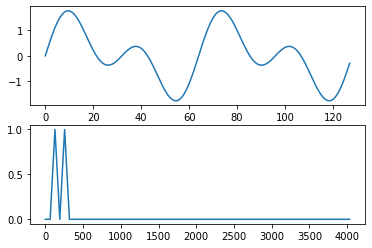

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

SAMPLE_RATE = 8192
N = 128 # Windowing


def fft(x):
    X = list()
    for k in range(0, N):
        window = 1 # np.sin(np.pi * (k+0.5)/N)**2
        X.append(complex(x[k] * window, 0))

    fft_rec(X)
    return X

def fft_rec(X):
    N = len(X)

    if N <= 1:
        return

    even = np.array(X[0:N:2])
    odd = np.array(X[1:N:2])

    fft_rec(even)
    fft_rec(odd)

    for k in range(0, N//2):
        t = np.exp(complex(0, -2 * np.pi * k / N)) * odd[k]
        X[k] = even[k] + t
        X[N//2 + k] = even[k] - t




x_values = np.arange(0, N, 1)

x = np.sin((2*np.pi*x_values / 32.0)) # 32 - 256Hz
x += np.sin((2*np.pi*x_values / 64.0)) # 64 - 128Hz

X = fft(x)


# Plotting 
_, plots = plt.subplots(2)

## Plot in time domain
plots[0].plot(x)

## Plot in frequent domain
powers_all = np.abs(np.divide(X, N//2))
powers = powers_all[0:N//2]
frequencies = np.divide(np.multiply(SAMPLE_RATE, np.arange(0, N//2)), N)
plots[1].plot(frequencies, powers)


## Show plots
plt.show()